In [1]:
#from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
#%matplotlib notebook
%matplotlib ipympl 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
def f2(x,y):
    return x**4 + y**4 - 2*(x-y)**2

In [3]:
Dx = lambda f,x,y,h=1e-5: (f(x+h,y) - f(x-h,y))/(2*h)
Dy = lambda f,x,y,h=1e-5: (f(x,y+h) - f(x,y-h))/(2*h)

In [4]:
x0, y0 = 0.,3.

In [5]:
Gradient = lambda f,x,y: np.array([Dx(f,x,y),Dy(f,x,y)])
Gradient(f2,x0,y0)

array([12., 96.])

In [16]:
def Minimizer(f, N = 100, gamma = 0.01):
    
    r = np.zeros((N,2))
    r[0] = np.random.uniform(-5.,5.,size=2)
    
    Grad = np.zeros((N,2))
    Grad[0] = Gradient(f,r[0,0],r[0,1])
    
    # We save the gradient in each step

    for i in tqdm(range(1,N)):
        r[i] = r[i-1] - gamma*Gradient(f,r[i-1,0],r[i-1,1])
        Grad[i] = Gradient(f,r[i-1,0],r[i-1,1])
        
        
    return r,Grad

def Minimizer2(f, N = 100, gamma = 0.01,momentum = 0.6):
    
    r = np.zeros((N,2))
    r[0] = np.array([0.,3.])
    
    Grad = np.zeros((N,2))
    Grad[0] = Gradient(f,r[0,0],r[0,1])
    
    # We save the gradient in each step

    for i in tqdm(range(1,N)):
        
        if i < 2:
            
            r[i] = r[i-1] - gamma*Gradient(f,r[i-1,0],r[i-1,1])
            Grad[i] = Gradient(f,r[i-1,0],r[i-1,1])
            
        else:
        
            r[i] = r[i-1] - gamma*Gradient(f,r[i-1,0],r[i-1,1]) + momentum*(r[i-2]-r[i-3])
            Grad[i] = Gradient(f,r[i-1,0],r[i-1,1])
        
    return r,Grad

In [17]:
N = 200
r,Grad = Minimizer2(f2,N)

100%|██████████| 199/199 [00:00<00:00, 26636.88it/s]


In [18]:
r

array([[ 0.00000000e+00,  3.00000000e+00],
       [-1.20000000e-01,  2.04000000e+00],
       [-2.06330880e-01,  3.58681344e+00],
       [-4.29705293e-01,  1.31673192e+00],
       [-5.48187564e-01,  2.22336038e+00],
       [-7.86484704e-01,  5.32541104e-01],
       [-8.90875637e-01,  1.12323806e+00],
       [-1.08613640e+00,  1.32625095e-01],
       [-1.14626915e+00,  5.35700419e-01],
       [-1.27045955e+00,  2.46211646e-03],
       [-1.27543177e+00,  2.95224177e-01],
       [-1.32978112e+00,  3.70781956e-02],
       [-1.29337980e+00,  2.67407766e-01],
       [-1.30187666e+00,  1.74186819e-01],
       [-1.25081727e+00,  3.71215700e-01],
       [-1.24251837e+00,  3.78118294e-01],
       [-1.19997763e+00,  5.58998654e-01],
       [-1.19624120e+00,  6.26512237e-01],
       [-1.17515438e+00,  7.98113908e-01],
       [-1.18692831e+00,  8.97217300e-01],
       [-1.19075631e+00,  1.05465377e+00],
       [-1.22010210e+00,  1.15700878e+00],
       [-1.24483118e+00,  1.28460101e+00],
       [-1.

In [19]:
Grad

array([[ 1.20000000e+01,  9.60000000e+01],
       [ 1.20000000e+01,  9.60000000e+01],
       [ 8.63308800e+00,  2.53186560e+01],
       [ 1.51374413e+01,  1.69408152e+02],
       [ 6.66837432e+00,  2.14596063e+00],
       [ 1.04272493e+01,  3.28770369e+01],
       [ 3.33015701e+00, -4.67198854e+00],
       [ 5.22824751e+00, -2.38785982e+00],
       [-2.50180880e-01, -4.86571477e+00],
       [ 7.03395025e-01, -6.11294788e+00],
       [-3.11074309e+00, -5.09168662e+00],
       [-2.01648935e+00, -6.17970001e+00],
       [-3.93846542e+00, -5.46723337e+00],
       [-2.41127462e+00, -6.16666425e+00],
       [-2.92185977e+00, -5.88311389e+00],
       [-1.33970199e+00, -6.28351617e+00],
       [-1.19051074e+00, -6.26630316e+00],
       [ 1.24291701e-01, -6.33720266e+00],
       [ 4.43762511e-01, -6.30734549e+00],
       [ 1.40157757e+00, -5.85952423e+00],
       [ 1.64800972e+00, -5.44754672e+00],
       [ 2.22814401e+00, -4.28929766e+00],
       [ 2.24322773e+00, -3.31303490e+00],
       [ 2.

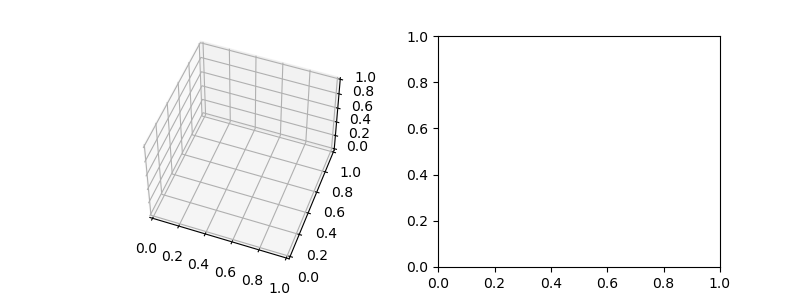

c:\Users\jessi\anaconda3\Lib\site-packages\matplotlib\quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
c:\Users\jessi\anaconda3\Lib\site-packages\matplotlib\quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


In [20]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(1,2,1, projection = '3d',elev = 50, azim = -70)
ax1 = fig.add_subplot(1,2,2)

x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
X,Y = np.meshgrid(x,y)
Z = f2(X,Y)

def init():
    
    ax.set_xlim3d(x[0],x[-1])
    ax.set_ylim3d(y[0],y[-1])
    ax.set_xlabel(r'$X$')
    ax.set_ylabel(r'$Y$')
    
def Update(i):
    
    ax.clear()
    ax1.clear()
    init()
    
    ax.set_title(r'$N=%.0f, Cost=%.3f$'%(i,f2(r[i,0],r[i,1])))
    ax.plot_surface(X,Y,Z, cmap = 'coolwarm', alpha=0.4)
    ax.scatter(r[:i,0],r[:i,1],f2(r[:i,0],r[:i,1]),marker='.',color='r')
    
    ax1.contour(X,Y,f2(X,Y))
    ax1.scatter(r[i,0],r[i,1],color='r') 
    ax1.quiver(r[i,0],r[i,1],-Grad[i,0],-Grad[i,1],color='r')


Animation = animation.FuncAnimation(fig, Update, frames=N,init_func=init)